# Plots

In [1]:

import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Download from Atlas and Load

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis

ens_codes = [
    'output_2'
]
data_dir = 'C:/Users/nikol/Documents/test_dir/coarse_grained'

analysis = EnsembleAnalysis(ens_codes, data_dir)
#analysis.download_from_database(database='atlas')
analysis.generate_trajectories()

Trajectory already exists for ensemble output_2. Loading trajectory.


AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

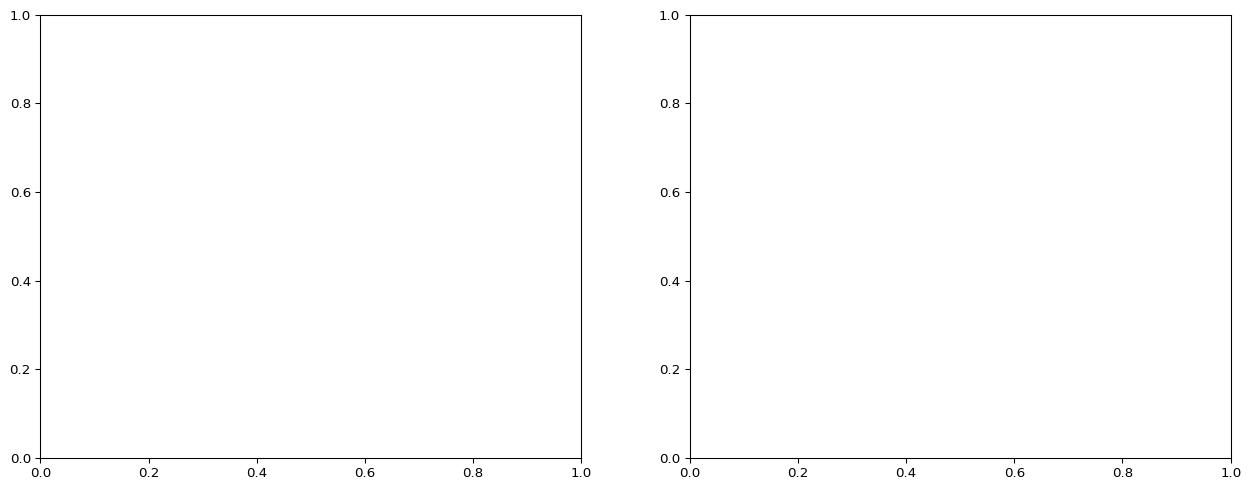

In [3]:
analysis.plot_average_dmap_comparison()

In [4]:
analysis.end_to_end_distances_plot(bins=50, violin_plot=True, median=False, means=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

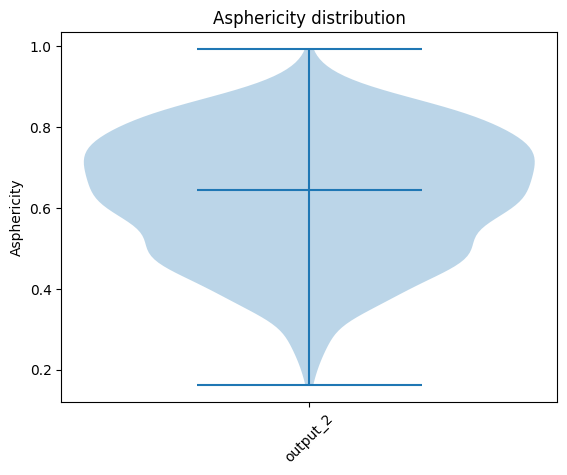

In [5]:
analysis.plot_asphericity_dist(bins=10, violin_plot=True)

Pearson coeff for output_2 = 0.703


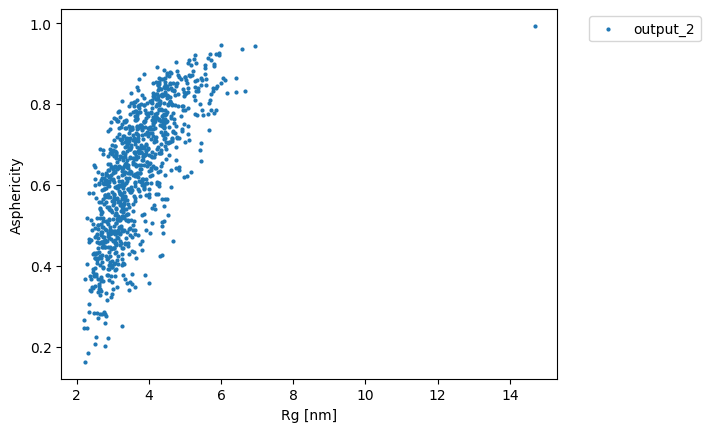

In [6]:
analysis.plot_rg_vs_asphericity()

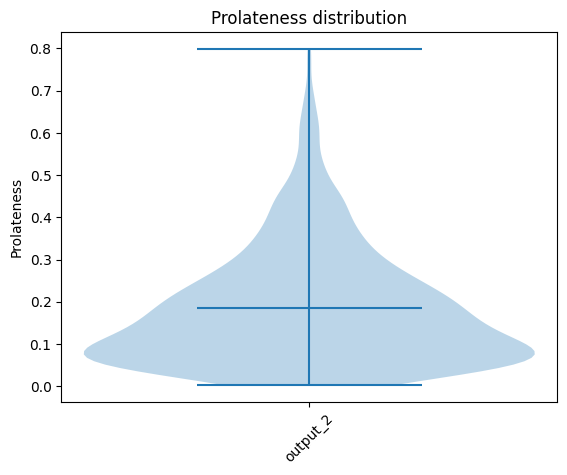

In [7]:
analysis.plot_prolateness_dist(bins=10, violin_plot=True)

Pearson coeff for output_2 = -0.322


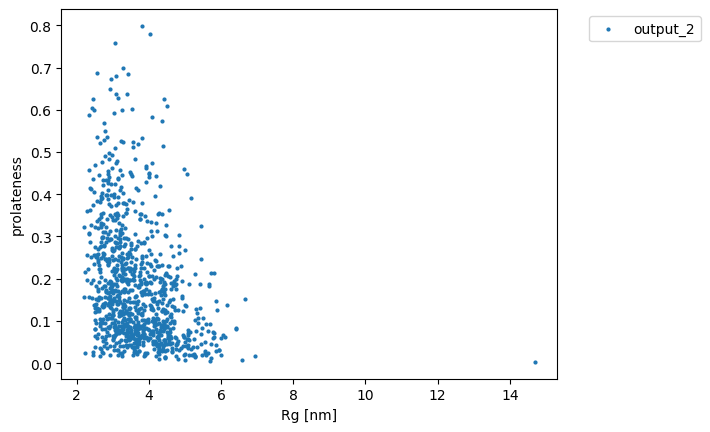

In [8]:
analysis.plot_rg_vs_prolateness()

{'output_2': True}
True
True


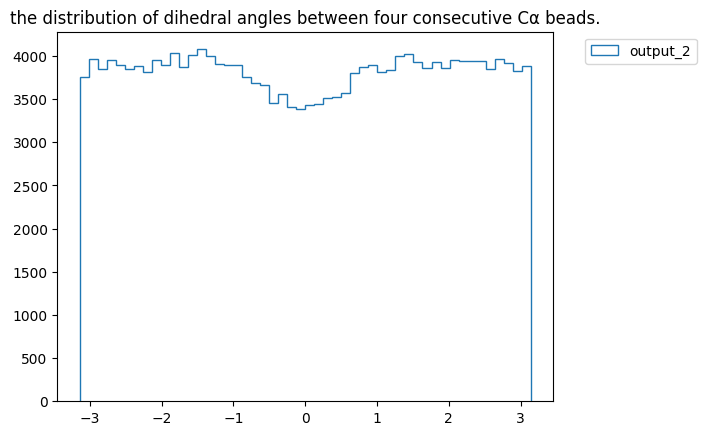

In [5]:
analysis.plot_alpha_angles_dist()

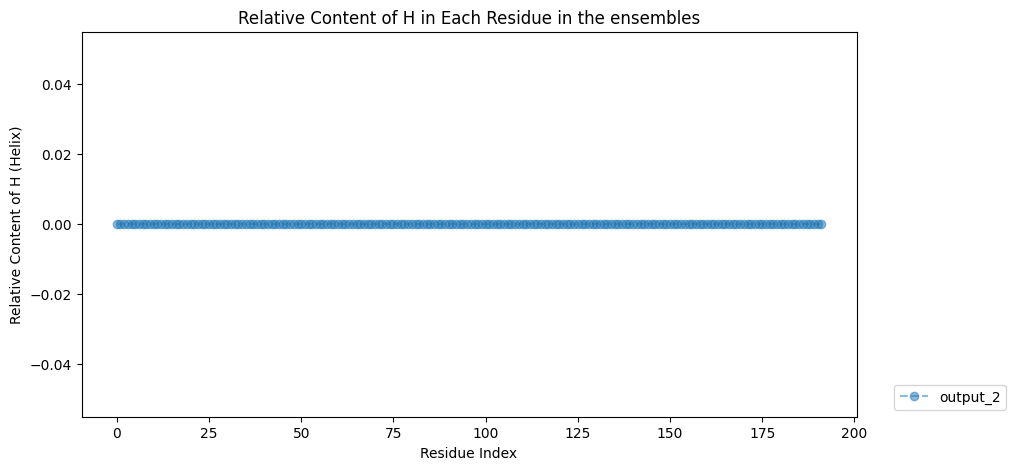

In [6]:
analysis.plot_relative_helix_content()

TypeError: 'Axes' object is not subscriptable

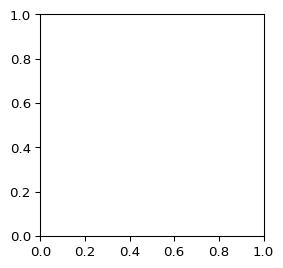

In [5]:
analysis.trajectories_plot_rg_comparison()

ValueError: No acceptable residue pairs found

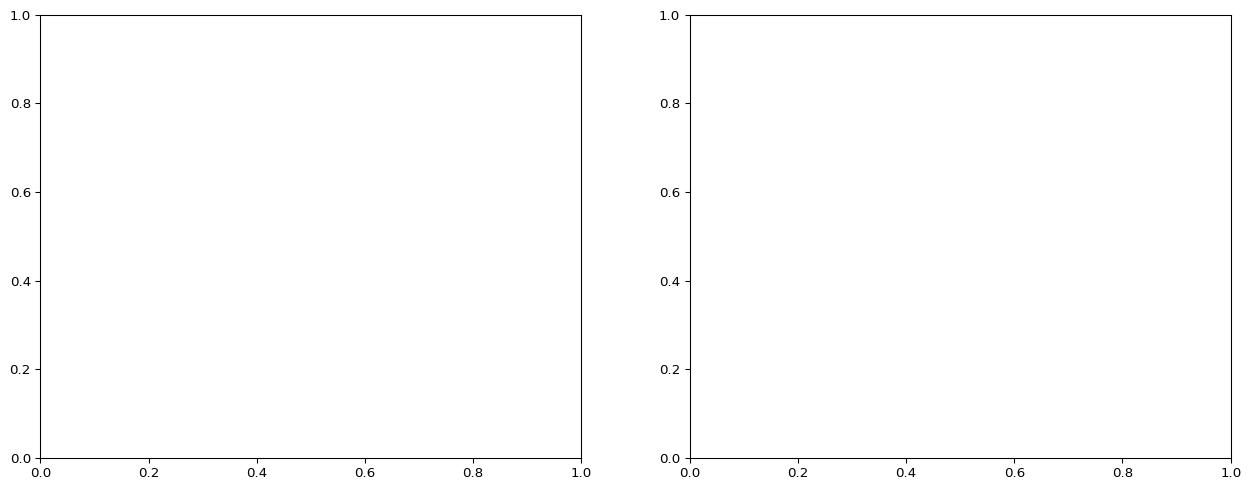

In [6]:
analysis.plot_contact_prob(title="test", threshold=0.8)

In [7]:
analysis.plot_ss_measure_disorder(pointer=[2,5])

ValueError: phi_psi feature extraction is not possible when working with coarse-grained models.

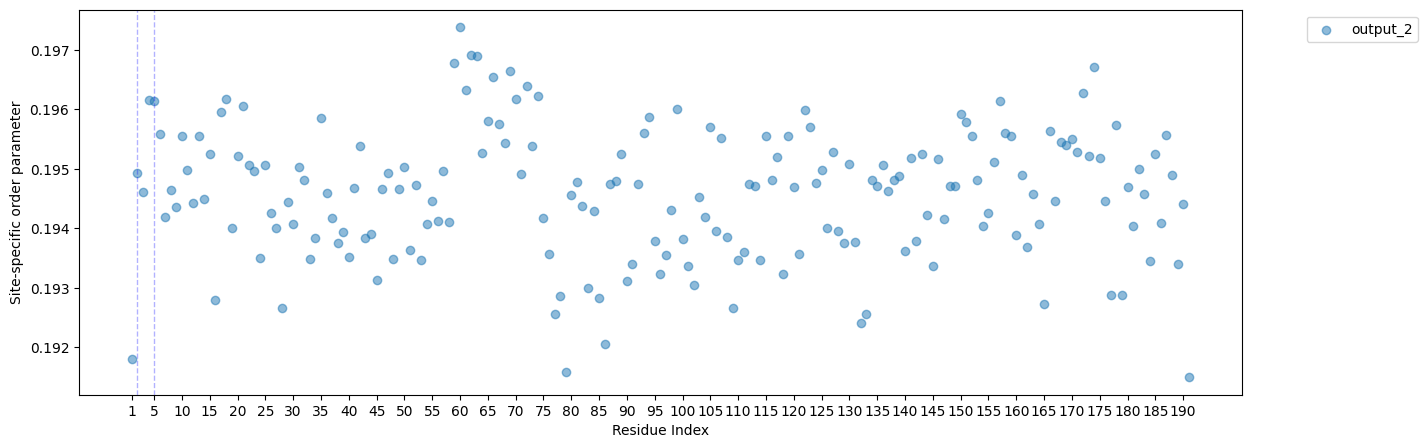

In [4]:
analysis.plot_ss_order_parameter(pointer=[5,2])